# Wide-angle camera photo transformation

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

### Import wide-angle image

In [211]:
hamburg = cv2.imread(os.path.join('data', 'hamburg.jpg'))
hamburg.shape

(323, 500, 3)

### Implement functions handling splitting an image

In [212]:
from typing import List

In [213]:
def modulo_split_width(width: int, k: int) -> List:
    """ Split given array into equal but central pieces """
        
    side_width, n_side = width // k, k // 2
    
    # Central rect width depends on the parity of k
    if k % 2 == 0:
        central_width = width % k
    else:
        central_width = side_width + width % k

    # Widths placed symmetrically
    splitted_widths = k//2 * [side_width] + [central_width] + k//2 * [side_width]
    
    return splitted_widths

In [214]:
modulo_split_width(500, 7)

[71, 71, 71, 74, 71, 71, 71]

In [215]:
modulo_split_width(500, 6)

[83, 83, 83, 2, 83, 83, 83]

In [216]:
from itertools import accumulate

In [217]:
def accumulated_modulo_split_width(width: int, k: int) -> List:
    """ Accumulated sums to be passed to np.split """
    
    acc = list(accumulate(modulo_split_width(width, k)))[:-1]
    
    return acc

In [218]:
accumulated_modulo_split_width(500, 7)

[71, 142, 213, 287, 358, 429]

In [219]:
accumulated_modulo_split_width(500, 6)

[83, 166, 249, 251, 334, 417]

In [220]:
def modulo_split_image(image: np.array, k: int) -> List:
    """ Split given image into equal but central pieces """
    
    image_width = image.shape[1]
    
    # Need to copy the image, because np.split alters it
    copy_image = image.copy()
    
    splitted_image = np.split(copy_image, accumulated_modulo_split_width(image_width, k), axis=1)
    
    return splitted_image

In [221]:
%%capture
modulo_split_image(hamburg, k=7)

In [222]:
def imshow_splitted(images: np.array, k: int = 5) -> None:

    fig, axes = plt.subplots(1, len(images))

    for no, image in enumerate(images):
        axes[no].imshow(image)


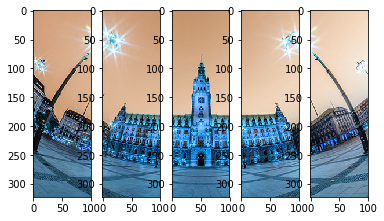

In [223]:
imshow_splitted(modulo_split_image(hamburg, 5))

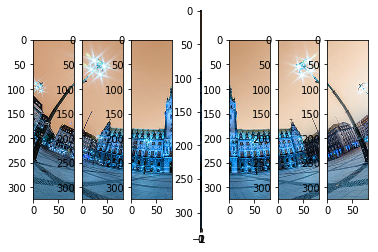

In [224]:
imshow_splitted(modulo_split_image(hamburg, 6))

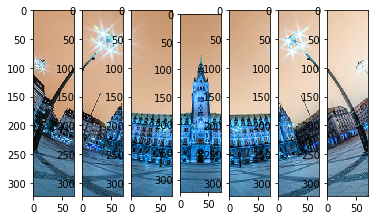

In [225]:
imshow_splitted(modulo_split_image(hamburg, 7))

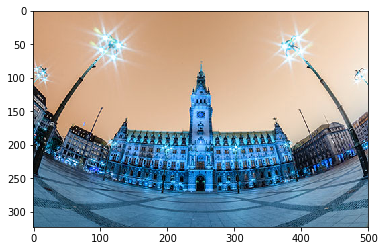

In [226]:
# Ensure if splitting keeps all the data unchanged
plt.imshow(np.concatenate(modulo_split_image(hamburg, 6), axis=1))